In [90]:
import tensorflow as tf
from tensorflow import keras
# from keras import layers
from keras.layers import Dense,Resizing,Rescaling,RandomFlip , RandomZoom,RandomRotation,Conv2D,Flatten,MaxPooling2D,LSTM
from keras.models import Sequential
from keras.utils import image_dataset_from_directory
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from keras.losses import SparseCategoricalCrossentropy
import numpy as np

In [2]:
dataset = image_dataset_from_directory(
    "../potato project"
)

Found 2152 files belonging to 3 classes.


In [3]:
class_names =dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

This is beacuase every batch there has 32 images


In [4]:
len(dataset)

68

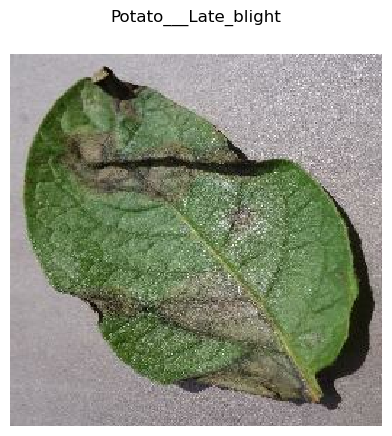

In [5]:
for image_batch,label_batch in dataset.take(1):
    # print(image_batch[0][1])
    # print(label_batch.numpy())
    plt.matshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')

In [6]:
len(dataset)

68

In [7]:
train = dataset.take(54)

In [8]:
valid_ds = dataset.skip(54)

In [9]:
valid = valid_ds.take(7)

In [10]:
test = valid_ds.skip(7)

In [11]:
print(len(train),len(valid) , len(test))

54 7 7


In [12]:
IMAGE_SIZE = 256
resize_and_rescale = Sequential([
    Resizing(IMAGE_SIZE ,IMAGE_SIZE),
    Rescaling(1.0/255)

])

In [13]:
data_augmentation = Sequential([
    RandomFlip(mode = 'horizontal_and_vertical'),
    RandomZoom(0.2),
    RandomRotation(0.2)
])

In [73]:
model = Sequential([
    resize_and_rescale,
    data_augmentation,
    Conv2D(32,(3,3) , activation='relu'),
    MaxPooling2D(2),
    Conv2D(64,(3,3) , activation='relu'),
    MaxPooling2D(2),
    Conv2D(128,(3,3) , activation='relu'),
    MaxPooling2D(2),
    Conv2D(64,(3,3) , activation='relu'),
    MaxPooling2D(2),
    Conv2D(32,(3,3) , activation='relu'),
    MaxPooling2D(2, padding='same'),
    Flatten(),
    Dense(3,activation = 'softmax')
])

In [74]:
model.compile(optimizer='adam' , loss=SparseCategoricalCrossentropy(from_logits=False) , metrics=['accuracy'])


In [83]:
history = model.fit(train,validation_data = valid , epochs = 5,verbose=1)

Epoch 1/5


54/54 [==============================] - 96s 2s/step - loss: 0.3521 - accuracy: 0.8530 - val_loss: 0.3198 - val_accuracy: 0.8482
Epoch 2/5
54/54 [==============================] - 96s 2s/step - loss: 0.3046 - accuracy: 0.8681 - val_loss: 0.2160 - val_accuracy: 0.9241
Epoch 3/5
54/54 [==============================] - 104s 2s/step - loss: 0.3069 - accuracy: 0.8669 - val_loss: 0.4094 - val_accuracy: 0.8348
Epoch 4/5
54/54 [==============================] - 91s 2s/step - loss: 0.2500 - accuracy: 0.9005 - val_loss: 0.2214 - val_accuracy: 0.9018
Epoch 5/5
54/54 [==============================] - 106s 2s/step - loss: 0.2192 - accuracy: 0.9120 - val_loss: 0.2151 - val_accuracy: 0.9330


In [84]:
test_accuracy = model.evaluate(test)

7/7 [==============================] - 3s 255ms/step - loss: 0.1710 - accuracy: 0.9350


In [85]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [86]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

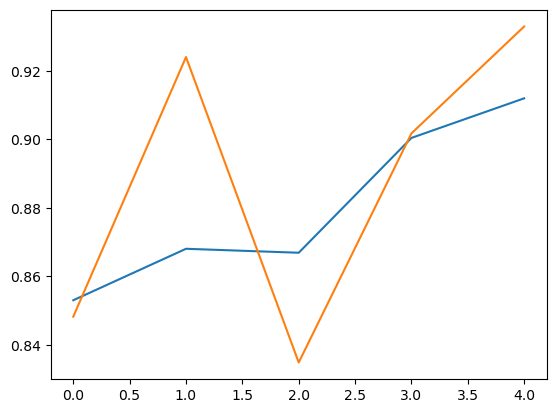

In [87]:
epochs = 5
plt.plot(range(epochs) , acc )
plt.plot(range(epochs) , val_acc)

Text(0.5, 1.0, 'Training and Validation accuracy')

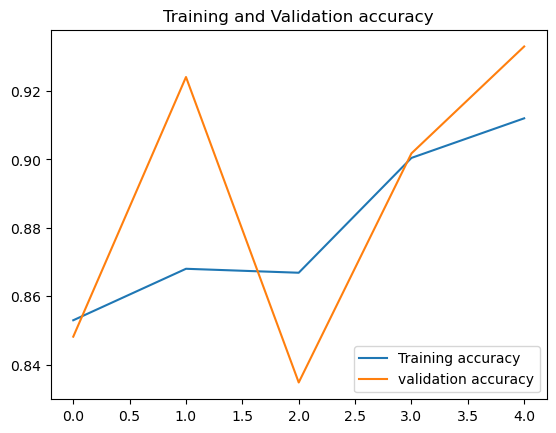

In [88]:
epochs = 5
plt.plot(range(epochs) , acc  , label ='Training accuracy')
plt.plot(range(epochs) , val_acc , label = 'validation accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation accuracy')

Text(0.5, 1.0, 'Training and Validation loss')

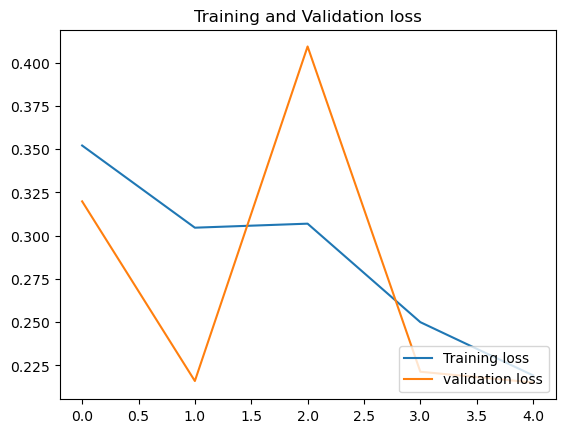

In [89]:
epochs = 5
plt.plot(range(epochs) , loss  , label ='Training loss')
plt.plot(range(epochs) , val_loss , label = 'validation loss')
plt.legend(loc = 'lower right')
plt.title('Training and Validation loss')

actual_label: Potato___Late_blight
1/1 [==============================] - 0s 314ms/step
predicted label : Potato___Late_blight


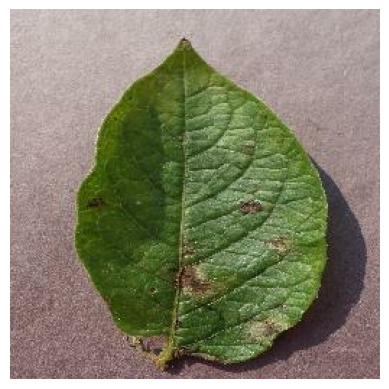

In [111]:
for image_batch,label_batch in test.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    plt.imshow(first_image)
    plt.axis('off')
    print('actual_label:',class_names[first_label])
    batch_pred = model.predict(image_batch)
    print('predicted label :' , class_names[np.argmax(batch_pred[0])])

In [113]:
model.save("POTATO")

INFO:tensorflow:Assets written to: POTATO\assets


INFO:tensorflow:Assets written to: POTATO\assets
